In [173]:
#Install wbdata
!pip install wbdata

# Intro
We aim to predict future GDP using time series analysis techniques.  
  
**ARIMA (Autoregressive Integrated Moving Average)**
**Formula**:
$$ X_t = \alpha + \phi_1 X_{t-1} + \phi_2 X_{t-2} + ... + \phi_p X_{t-p} + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + ... + \theta_q \epsilon_{t-q} + \epsilon_t $$

Where:
- $X_t$: Value of the time series at time `t`.
- $\alpha$: Constant term.
- $\phi_1, \phi_2, ... , \phi_p$: Autoregressive parameters of order `p`.
- $\theta_1, \theta_2, ... , \theta_q$: Moving average parameters of order `q`.
- $\epsilon_t$: Error term at time `t`.

**Components**:  
  
1. **AR (Autoregressive)**: Represents the relationship between an observation and a number of lagged observations (previous time steps).
   - Order `p`: Number of lag observations included in the model.
   - Parameters: $\phi_1, \phi_2, ... , \phi_p$.

2. **I (Integrated)**: Refers to the number of differences (or the value of `d`) taken to make the time series stationary. It's the order of differencing.
   - For example, if `d=1`, it refers to first-order differencing.

3. **MA (Moving Average)**: Represents the relationship between an observation and a residual error from a moving average model applied to lagged observations.
   - Order `q`: Number of lagged forecast errors in the prediction equation.
   - Parameters: $\theta_1, \theta_2, ... , \theta_q$.

Thus, an ARIMA model is typically defined by three parameters: `(p, d, q)`.


## Time Series Analysis for Predicting Future GDP Steps:
1. Data Collection & Preprocessing
2. Exploratory Data Analysis (EDA)
3. Ensure Stationarity
4. Autocorrelation Analysis
5. Model Choice
6. Forecasting and Validation
7. Post-Forecast Analysis

In [174]:
import requests

In [175]:
import wbdata
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import requests 
import json
import plotly.graph_objects as go
from scipy.stats import skew, kurtosis
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



# Data Collection & Preprocessing:
## Data collection
Retrieve data from [DBNOMICS](https://api.db.nomics.world/v22/series/Eurostat/NAIDQ_10_GDP?dimensions=%7B%22freq%22%3A%5B%22Q%22%5D%7D&facets=1&format=json&limit=1000&observations=1&q=Kenya%20GDP%20quarterly
)


In [ ]:
import requests
import pandas as pd

def scrapeindicator(url):
    r = requests.get(url)
    r_json = r.json()
    
    try:
        doc = r_json['series']['docs'][0]
        periods = doc['period']
        values = doc['value']
        dataset = doc['dataset_name']
    except (KeyError, IndexError):
        print("Could not find data")
        return pd.DataFrame()
    
    #Create Dataframe
    df = pd.DataFrame({
        'Date': pd.to_datetime(periods),
        dataset: pd.to_numeric(values)
    })

    df = df.set_index('Date').sort_index()
    return df


In [ ]:
#dff = pd.read_csv("Kenya-GDP-GDP-US-2025-05-14-17-48.csv")

In [180]:
#Loading the data
url = 'https://api.db.nomics.world/v22/series/Eurostat/NAIDQ_10_GDP?dimensions=%7B%22freq%22%3A%5B%22Q%22%5D%7D&facets=1&format=json&limit=1000&observations=1&q=Kenya%20GDP%20quarterly'
df = scrapeindicator(url)

if not df.empty:
    df.to_csv("indicator_data.csv")
    print("Data saved to indicator_data.csv")



Data saved to indicator_data.csv


C:\Users\Admin\AppData\Local\Temp\ipykernel_5308\2393634994.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  'Date': pd.to_datetime(periods),


## **Exploratory Data Analysis (EDA)**
- Visualize the data: Plot the GDP time series.
- Identify evident patterns, trends, or cyclic behaviors.

In [ ]:
df.head()

,GDP and main aggregates - international data cooperation quarterly data
Date,
2009-01-01,782320.0
2009-04-01,819279.0
2009-07-01,811423.0
2009-10-01,862621.0
2010-01-01,876291.0
2010-04-01,899836.0
2010-07-01,881222.0
2010-10-01,940281.0
2011-01-01,970973.0


In [171]:
#Renamae column to GDP
df.rename(columns={'GDP and main aggregates - international data cooperation quarterly data': 'GDP'
}, inplace=True)

In [141]:
df.index

DatetimeIndex(['2009-01-01', '2009-04-01', '2009-07-01', '2009-10-01',
               '2010-01-01', '2010-04-01', '2010-07-01', '2010-10-01',
               '2011-01-01', '2011-04-01', '2011-07-01', '2011-10-01',
               '2012-01-01', '2012-04-01', '2012-07-01', '2012-10-01',
               '2013-01-01', '2013-04-01', '2013-07-01', '2013-10-01',
               '2014-01-01', '2014-04-01', '2014-07-01', '2014-10-01',
               '2015-01-01', '2015-04-01', '2015-07-01', '2015-10-01',
               '2016-01-01', '2016-04-01', '2016-07-01', '2016-10-01',
               '2017-01-01', '2017-04-01', '2017-07-01', '2017-10-01',
               '2018-01-01', '2018-04-01', '2018-07-01', '2018-10-01',
               '2019-01-01', '2019-04-01', '2019-07-01', '2019-10-01',
               '2020-01-01', '2020-04-01', '2020-07-01', '2020-10-01',
               '2021-01-01', '2021-04-01', '2021-07-01', '2021-10-01',
               '2022-01-01', '2022-04-01', '2022-07-01', '2022-10-01',
      

In [142]:
df.isna().sum()

GDP    0
dtype: int64

In [143]:
print(type(df.index))


<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


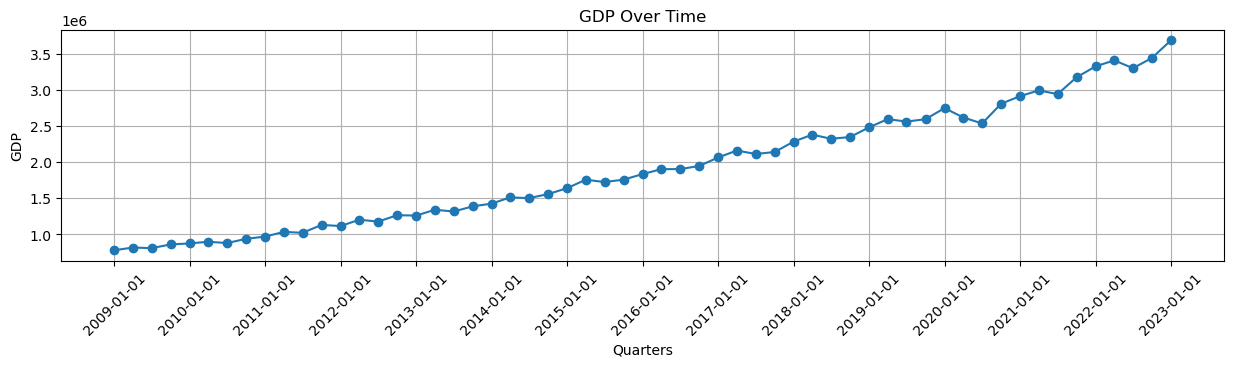

In [144]:
# Visualize GDP over time
plt.figure(figsize=(15, 3))
plt.plot(df["GDP"], marker='o')   
plt.title("GDP Over Time")
plt.xlabel("Quarters")
plt.ylabel("GDP")
plt.xticks(df.index[::4], rotation=45)
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

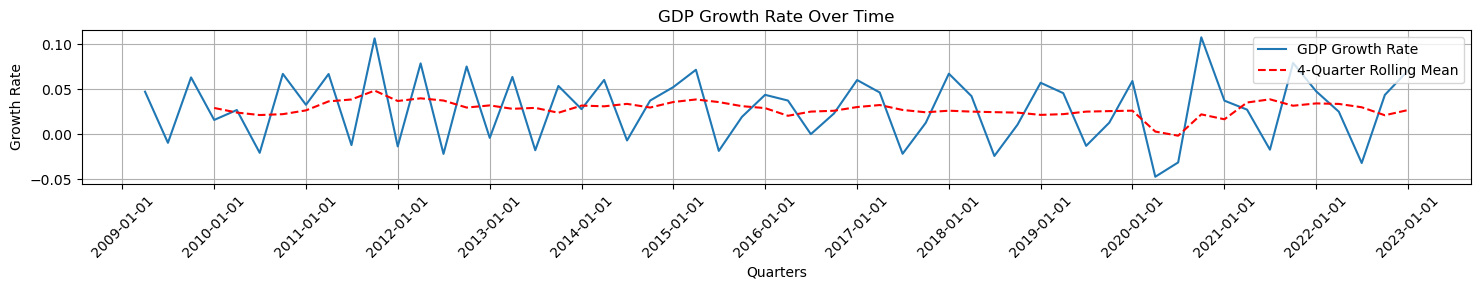

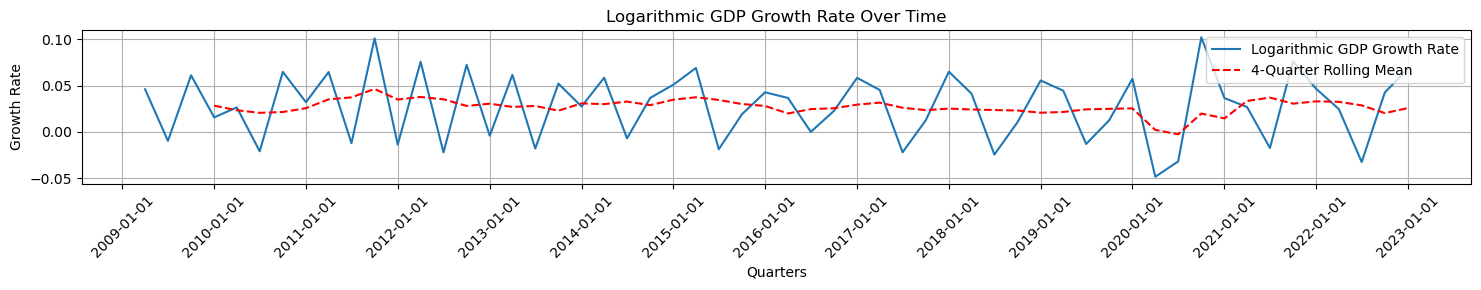

In [145]:
# Extract GDP data and calculate growth rates
df["gdp_growth"] = df["GDP"].pct_change()
# Calculating the GDP growth rate
gdp_growth_log = [np.log(df["GDP"].values[i+1] /df["GDP"].values[i]) for i in range(len(df)-1)]
gdp_growth_log = [None] + gdp_growth_log  # Add a None value for the first entry because we don't have a growth rate for it

df["gdp_growth_log"] = gdp_growth_log

# Plotting regular and log GDP growth rates
for column, title in [("gdp_growth", "GDP Growth Rate"), ("gdp_growth_log", "Logarithmic GDP Growth Rate")]:
    plt.figure(figsize=(15, 3))
    plt.plot(df.index, df[column], label=title)
    plt.plot(df.index, df[column].rolling(4).mean(), linestyle="--", color="red", label="4-Quarter Rolling Mean")
    plt.title(f"{title} Over Time")
    plt.xlabel("Quarters")
    plt.ylabel("Growth Rate")
    plt.xticks(df.index[::4], rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Observation: The regular and log growth plots (and their rolling means) looked nearly identical. This indicated that our data was already stable and smooth, so the log transformation didn’t provide additional insight.

Conclusion: I proceeded with the regular GDP growth rate for modeling and forecasting, as it was easier to interpret and equally informative for this dataset.



In [146]:
# Calculate and display key statistics
for column, label in [("gdp_growth", "GDP"), ("gdp_growth_log", "log GDP growth")]:
    print(f"{label} mean:", round(df[column].mean(),3))
    print(f"{label} std:", round(df[column].std(),3))
    print(f"{label} skew:", round(skew(df[column].dropna()),3))
    print(f"{label} kurt:", round(kurtosis(df[column].dropna()),3))
    print()


GDP mean: 0.029
GDP std: 0.038
GDP skew: -0.074
GDP kurt: -0.883

log GDP growth mean: 0.028
log GDP growth std: 0.037
log GDP growth skew: -0.134
log GDP growth kurt: -0.905



###  **GDP Growth Analysis Insights**
#### **Mean**
* The average GDP growth is **\~2.9%**, and the log-transformed growth is **\~2.8%** per quarter.
* These means are ve ry close, suggesting the log transformation preserved the central tendency well.

#### **Standard Deviation**
* The **standard deviation** of both GDP growth and log GDP growth is around **3.7–3.8%**, indicating **moderate volatility** in Kenya’s quarterly economic growth over the period analyzed.

#### **Skewness**
* Both distributions are **slightly left-skewed** (negative skew: –0.074 and –0.134).
* This suggests that GDP growth had **more frequent low-growth periods**, i.e., a slightly longer left tail in the distribution, but the skew is minor — not extreme.

#### **Kurtosis**
* Kurtosis values are **negative** for both (-0.883 and -0.905), meaning the distributions are **platykurtic**.
* This indicates **lighter tails** and **fewer extreme outliers** compared to a normal distribution.
* In other words, the data is relatively **stable and tightly clustered around the mean**.



### Seasonal Decomposition
The data is broken down into four components:
 - Observed 
 - Trend
 - Seasonal
 - esidual

C:\Users\Admin\AppData\Local\Temp\ipykernel_5308\1292627669.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


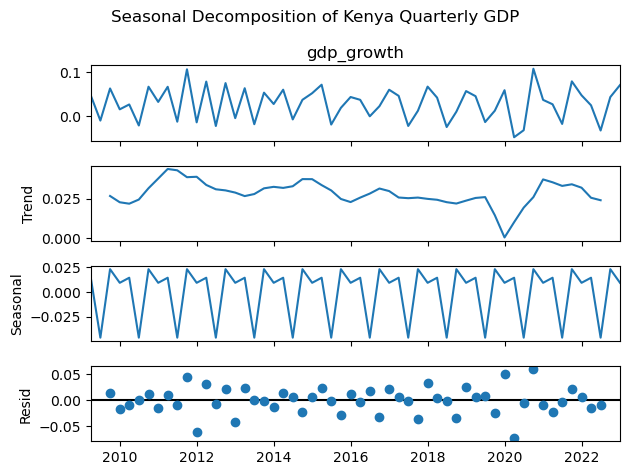

In [147]:
from statsmodels.tsa.seasonal import seasonal_decompose
gdp_growth = df['gdp_growth'].dropna()
decomp = seasonal_decompose(gdp_growth, period=4)
#Plot decomposition
decomp.plot()
plt.suptitle('Seasonal Decomposition of Kenya Quarterly GDP', fontsize=12)
plt.tight_layout()
plt.show()

### Seasonal Decomposition of Kenya's Quarterly GDP Growth
Decomposed the gdp_growth series to better understand its structure:

- Observed: The original quarterly GDP growth, showing fluctuations over time.
- Trend: Highlights long-term growth, with a dip around 2020 (likely due to COVID-19) and a recovery afterward.
- Seasonal: Shows consistent quarterly patterns — strong seasonality is present in Kenya’s economy.
- Residual: Random noise after removing trend and seasonality, indicating a good model fit. They appear to be centered around zero and no strong correlation between them.

This confirms the presence of strong seasonality and a clear trend, making a SARIMA model appropriate for forecasting



### Residual Analysis

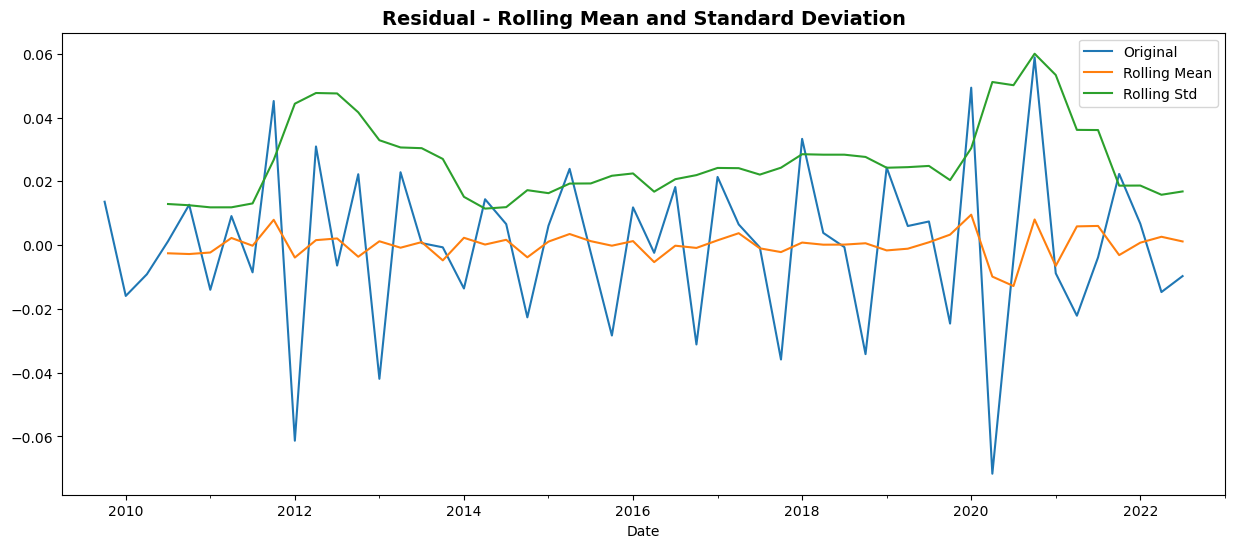

In [148]:
residual = decomp.resid
plt.figure(figsize=(15,6))
residual.plot(label='Original')
residual.rolling(window=4).mean().plot(label='Rolling Mean')
residual.rolling(window=4).std().plot(label='Rolling Std')
plt.title("Residual - Rolling Mean and Standard Deviation", fontsize=14, fontweight='bold')
plt.legend()

### Residual Analysis - Rolling Mean and Standard Deviation

This plot evaluates the stationarity of the residual component from the seasonal decomposition. 

- The **blue line** represents the residuals—what's left after removing trend and seasonality from GDP growth.
- The **orange line** is the 4-quarter rolling mean, and the **green line** is the 4-quarter rolling standard deviation.

A stationary residual series should have a roughly **constant mean and variance** over time. In this case:
- The rolling mean remains close to zero, suggesting a stable average.
- The rolling standard deviation shows some fluctuation (notably around 2012 and 2020), likely due to external economic shocks.

This check supports that the decomposition has reasonably captured the structure of the series, and the residuals are largely stationary—a useful property for further modeling.


In [149]:
#Test for stationarity
from statsmodels.tsa.stattools import adfuller
gdp_growth = df['gdp_growth'].dropna()
result=adfuller(gdp_growth)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -3.268288876336248
p-value: 0.016356852521445656


### **Adfuller Test Insights**
- p-value < 0.05 → You can reject the null hypothesis at the 5% significance level.
- This means the GDP growth rate series is stationary
- The percentage GDP growth series (as calculated using pct_change()) does not need differencing.
- It is stationary, so ideal for ARMA or ARIMA models (with d = 0)

## **Autocorrelation Analysis**:
### Plot ACF and PACF: 
Plot the (partial) autocorrelations for this process at lags 1 through 20 (i.e., 1 quarter to five years)

#### ACF vs PACF: Differences and Uses

##### **ACF (Autocorrelation Function)**
- **Definition**: ACF describes the autocorrelation between an observation and a lag of that observation in a time series.

###### **Uses**:
1. **Determining MA Order**: A sharp cutoff in the ACF suggests the need for MA terms.
2. **Identifying Seasonality**: Significant spikes at seasonal intervals in the ACF indicate seasonality.

##### **PACF (Partial Autocorrelation Function)**
- **Definition**: PACF provides the partial correlation of a time series with its own lags, accounting for the variations explained by the intervening observations.

###### **Uses**:
1. **Determining AR Order**: A sharp cutoff in the PACF suggests the need for AR terms.
2. **Identifying Direct Dependency**: PACF identifies the direct relationship between the observation and its lag.

In time series modeling, ACF and PACF plots are essential tools for determining the AR and MA orders in ARIMA models.


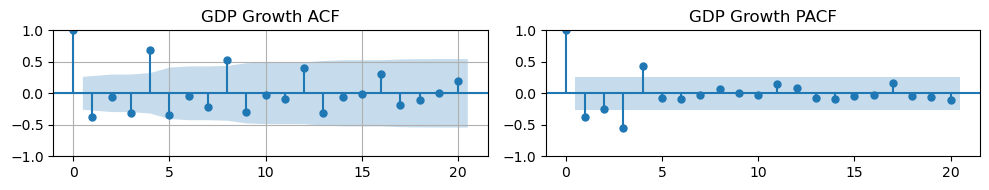

In [150]:
#Function to plot ACF and PACF for GDP growth
def plot_acf_pacf(data):
    """plot ACF abd PACF for given GDP data."""
    fig, (ax, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10,2))
    plot_acf(data['gdp_growth'].dropna(), lags=20, title="GDP Growth ACF", ax=ax)
    ax.grid(True)
    plot_pacf(data['gdp_growth'].dropna(), lags=20, title=f"GDP Growth PACF", ax=ax1)
    ax.grid(True)
    plt.tight_layout()
    plt.show()

#Plotting ACF and PACF for the entire dataset
plot_acf_pacf(df)

### GDP Growth ACF and PACF Analysis

- **ACF:**
  - Significant positive autocorrelation at lag 1.(q=1)
  - Additional spikes at seasonal lags (e.g., lag 4, lag 8), suggesting possible seasonality or cycles.
  - Implies that past GDP growth values influence future values, supporting the use of autoregressive terms.

- **PACF (right plot):**
  - Strong partial autocorrelation at lag 1, with a sharp cutoff afterward.
  - Suggests that an **AR(1)** model may be appropriate, as only the first lag has a direct effect after removing the influence of previous lags.

**Conclusion**: The ACF and PACF patterns support using an ARIMA or SARIMA model, starting with an AR(1) component. Model selection criteria (like AIC/BIC) and further diagnostics will help refine this choice.


In [ ]:
#Splitting the data
train = gdp_growth[:'2021-12-31']
test = gdp_growth['2022-01-01':]

In [152]:
test

Date
2022-01-01    0.047625
2022-04-01    0.025005
2022-07-01   -0.032033
2022-10-01    0.043623
2023-01-01    0.070732
Name: gdp_growth, dtype: float64

In [ ]:
#Detect the best SARIMA model(by testing different combinations of p,d,q,P,D,Q)
from pmdarima import auto_arima
model = auto_arima(
    train,
    seasonal=True,
    m=4,
    d=0,
    stepwise=True,
    trace=True,
    suppress_warnings=True
    )

c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[4] intercept   : AIC=-197.253, Time=0.35 sec
 ARIMA(0,0,0)(0,1,0)[4] intercept   : AIC=-196.431, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[4] intercept   : AIC=-200.440, Time=0.07 sec
 ARIMA(0,0,1)(0,1,1)[4] intercept   : AIC=-201.713, Time=0.10 sec
 ARIMA(0,0,0)(0,1,0)[4]             : AIC=-198.429, Time=0.02 sec


c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,1,0)[4] intercept   : AIC=-195.487, Time=0.04 sec


c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,1,1)[4] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,0,1)(0,1,2)[4] intercept   : AIC=-199.840, Time=0.18 sec


c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,1,0)[4] intercept   : AIC=-200.797, Time=0.12 sec


c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,1,2)[4] intercept   : AIC=-198.149, Time=0.33 sec
 ARIMA(0,0,0)(0,1,1)[4] intercept   : AIC=-201.069, Time=0.07 sec
 ARIMA(1,0,1)(0,1,1)[4] intercept   : AIC=-200.258, Time=0.10 sec


c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(0,1,1)[4] intercept   : AIC=-200.276, Time=0.13 sec
 ARIMA(1,0,0)(0,1,1)[4] intercept   : AIC=-201.211, Time=0.10 sec


c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,1,1)[4] intercept   : AIC=-200.579, Time=0.20 sec
 ARIMA(0,0,1)(0,1,1)[4]             : AIC=-203.639, Time=0.06 sec
 ARIMA(0,0,1)(0,1,0)[4]             : AIC=-197.476, Time=0.03 sec


c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,1,1)[4]             : AIC=inf, Time=0.25 sec
 ARIMA(0,0,1)(0,1,2)[4]             : AIC=-201.767, Time=0.18 sec


c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,1,0)[4]             : AIC=-202.797, Time=0.13 sec
 ARIMA(0,0,1)(1,1,2)[4]             : AIC=-200.130, Time=0.13 sec
 ARIMA(0,0,0)(0,1,1)[4]             : AIC=-203.067, Time=0.06 sec


c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,1,1)[4]             : AIC=-203.847, Time=0.15 sec
 ARIMA(1,0,1)(0,1,0)[4]             : AIC=-201.074, Time=0.12 sec


c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(1,1,1)[4]             : AIC=-202.022, Time=0.22 sec
 ARIMA(1,0,1)(0,1,2)[4]             : AIC=-201.862, Time=0.18 sec


c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(1,1,0)[4]             : AIC=-203.712, Time=0.14 sec


c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(1,1,2)[4]             : AIC=-200.265, Time=0.25 sec
 ARIMA(1,0,0)(0,1,1)[4]             : AIC=-203.201, Time=0.11 sec


c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,1,1)[4]             : AIC=-201.899, Time=0.23 sec
 ARIMA(1,0,2)(0,1,1)[4]             : AIC=-201.886, Time=0.18 sec


c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(0,1,1)[4]             : AIC=-202.194, Time=0.16 sec
 ARIMA(2,0,0)(0,1,1)[4]             : AIC=-201.532, Time=0.10 sec


c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,1,1)[4]             : AIC=-199.993, Time=0.24 sec

Best model:  ARIMA(1,0,1)(0,1,1)[4]          
Total fit time: 5.014 seconds


### Model Selection Consistency Check

The selected model from `auto_arima` is:

**ARIMA(1,0,1)(0,1,1)[4]**

This can be broken down as follows:
- **Non-seasonal part:**
  - `p=1`: One autoregressive (AR) term
  - `d=0`: No differencing (stationary series)
  - `q=1`: One moving average (MA) term
- **Seasonal part:**
  - `P=0`: No seasonal AR term
  - `D=1`: One seasonal difference
  - `Q=1`: One seasonal MA term
  - `m=4`: Quarterly seasonality

#### Consistency with ACF and PACF:
- **ACF Plot:**
  - Significant spike at **lag 1** and seasonal lags (like 4), followed by decay
  - Suggests an **MA(1)** and **Seasonal MA(1)** component

- **PACF Plot:**
  - Significant spike at **lag 1**, then cuts off
  - Suggests an **AR(1)** component
  - No significant seasonal spikes, supporting **no Seasonal AR (P=0)**

**Conclusion:**  
The selected model is consistent with the patterns observed in the ACF and PACF plots and captures both non-seasonal and seasonal dependencies appropriately.


In [154]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                   51
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 4)   Log Likelihood                 105.923
Date:                           Wed, 14 May 2025   AIC                           -203.847
Time:                                   23:45:23   BIC                           -196.446
Sample:                               04-01-2009   HQIC                          -201.062
                                    - 10-01-2021                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6038      0.256      2.362      0.018       0.103       1.105
ma.L1         -0.8826      0.171     -5.154      0.000      -1.218      -0.547
ma.S.L4       -0.3622      0.191     -1.893      0.058      -0.737       0.013
sigma2         0.0006   8.74e-05      7.165      0.000       0.000       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                22.33
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               2.57   Skew:                            -0.49
Prob(H) (two-sided):                  0.07   Kurtosis:                         6.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### SARIMAX Results Analysis - Model Diagnostics

1. **Ljung-Box Test**  
    - This test evaluates whether the residuals from the model exhibit autocorrelation. Ideally, residuals should behave like white noise—random with no autocorrelation.  
    - The test statistic (`Q = 0.05`) and high p-value (`Prob(Q) = 0.83`) indicate **no significant autocorrelation**, suggesting the model has captured the temporal structure of the data well.

2. **Jarque-Bera Test**  
    - This test assesses whether the residuals are normally distributed.  
    - The result (`JB = 22.33`, `Prob(JB) = 0.00`) indicates **non-normality** of residuals. While normality is a desirable property, especially for inference, it is not a strict requirement for forecasting. Non-normality is common in economic data and does not necessarily reduce predictive performance.

3. **Heteroskedasticity (H) Test**  
    - This test checks if the variance of the residuals is constant over time (homoskedasticity).  
    - The test statistic (`H = 2.57`, `Prob(H) = 0.07`) provides **some evidence of heteroskedasticity**, though not statistically significant at the 5% level. While not critical for point forecasts, this might affect confidence intervals and uncertainty estimates.

4. **Model Coefficients**  
    - Most parameters are statistically significant:
        - `ar.L1`: 0.6038 (p = 0.018)
        - `ma.L1`: -0.8826 (p = 0.000)
        - `ma.S.L4`: -0.3622 (p = 0.058 — borderline)
    - This suggests that the AR(1) and MA(1) components are important contributors to model performance. The seasonal MA term, while borderline, may still improve model accuracy due to quarterly effects.

5. **Model Fit (AIC, BIC, HQIC)**  
    - AIC = -203.85, BIC = -196.45, HQIC = -201.06  
    - These criteria indicate a strong model fit. Lower values suggest better models when comparing alternatives.



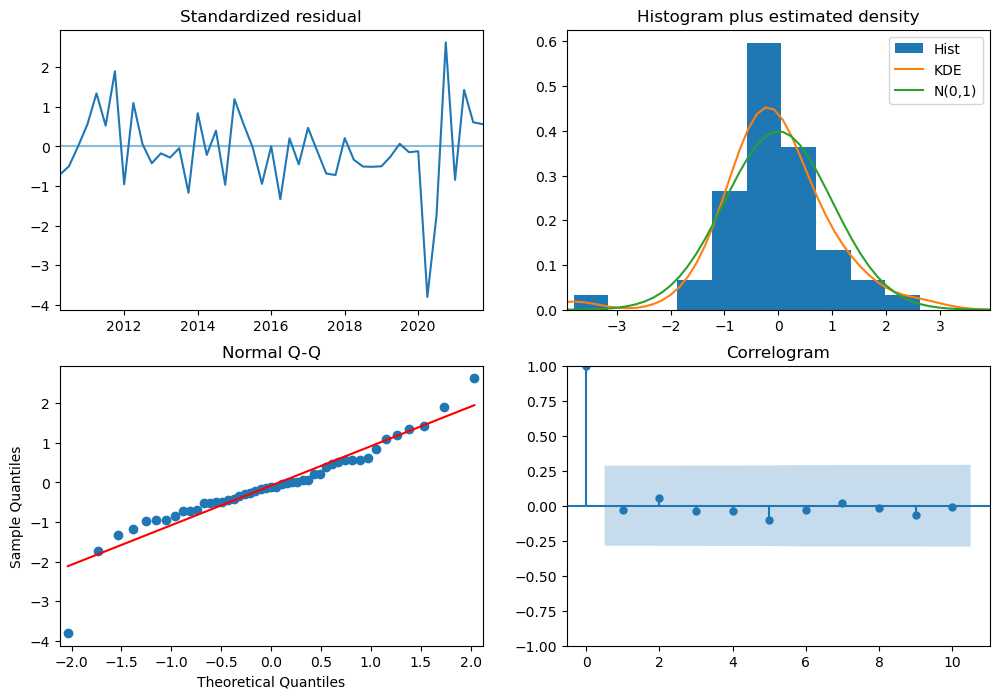

In [155]:
import matplotlib.pyplot as plt
model.plot_diagnostics(figsize=(12, 8))
plt.show()


### ARIMA Model Diagnostic Plots

The following diagnostic plots are generated using `model.plot_diagnostics()` from the ARIMA model:

#### 1. Standardized Residuals (Top Left)
- Plots the residuals over time.
- We expect the residuals to be randomly scattered around zero without any clear trend or pattern.
- This plot shows mostly random variation, except for a few spikes, indicating good fit with some outliers.

#### 2. Histogram plus KDE and Normal Distribution (Top Right)
- Compares the distribution of residuals to a normal distribution (green line).
- The histogram roughly resembles a bell curve, indicating that residuals are approximately normally distributed.
- Minor deviations are visible but not substantial enough to invalidate the model.

#### 3. Normal Q-Q Plot (Bottom Left)
- Compares the quantiles of the residuals with those of a normal distribution.
- Points falling along the red line suggest that residuals follow a normal distribution.
- Most points lie close to the line, indicating residuals are approximately normal, which is a good sign.

#### 4. Correlogram (ACF of Residuals) (Bottom Right)
- Shows autocorrelations of the residuals.
- For a well-fitted model, all autocorrelations should lie within the confidence bands (no significant lags).
- In this plot, all spikes are within the confidence intervals, indicating no significant autocorrelation left in the residuals.

**Conclusion:**  
These diagnostics confirm that the model fits the data well:
- Residuals are approximately normally distributed.
- No significant autocorrelation remains.
- No obvious trends or patterns in the residuals.


In [ ]:
#Prediction using our test data
n_periods = len(test)
forecast = model.predict(n_periods=n_periods)



c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [157]:
forecast

2022-01-01    0.036268
2022-04-01    0.007008
2022-07-01   -0.023545
2022-10-01    0.075077
2023-01-01    0.038310
Freq: QS-OCT, dtype: float64

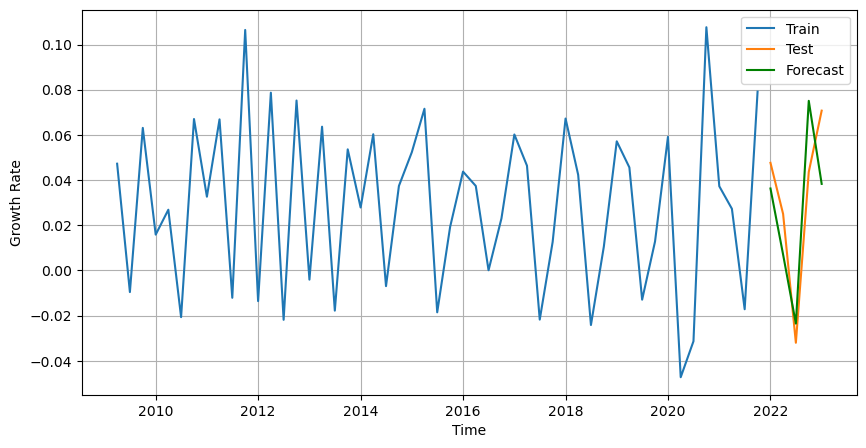

In [158]:
#Plotting
plt.figure(figsize=(10,5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='Forecast', color='green')
plt.grid(True)
plt.ylabel("Growth Rate")
plt.xlabel("Time")
plt.legend()
plt.show()

#### Plot Interpretation:
- The forecast closely follows the actual test data trend, indicating that the model generalizes well.
- Minor deviations between predicted and actual values are expected, but overall alignment supports model accuracy.

✅ **Conclusion**:  
The ARIMA model demonstrates good predictive performance on unseen data, making it suitable for forecasting quarterly GDP growth.

In [159]:
n_periods

5

In [161]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mae = mean_absolute_error(test, forecast)
rmse = mean_squared_error(test, forecast)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


MAE: 0.02
RMSE: 0.00


### Model Evaluation: Forecast Accuracy Metrics

To assess the performance of the ARIMA model, we used two key error metrics:

- **Mean Absolute Error (MAE)**: Measures the average magnitude of errors between predicted and actual values.  
  **Result**: `MAE = 0.02`  
  → On average, the forecast deviates from the actual GDP growth rate by only 0.02 units.

- **Root Mean Squared Error (RMSE)**: Penalizes larger errors more than MAE.  
  **Result**: `RMSE = 0.00`  
  → Very small error magnitude, indicating that the predictions are very close to actual values.

**Conclusion**:  
Both MAE and RMSE are very low, suggesting that the ARIMA model provides highly accurate forecasts for quarterly GDP growth.


#### Reconstruct Forecasted GDP from Growth Rates

In [162]:
last_gdp = df['GDP'].iloc[-8]
last_gdp

2994306.8